In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np

In [3]:
mpl.rcdefaults()
plt.style.use(["../stylesheet.mplstyle"])
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [4]:
directory = "../../jackknife-accuracy-study/tophat-cubic-noise-05"
num_trials = 250
filepaths = [f"{directory}/trial-{i}.csv" for i in range(num_trials)]
dfs = [pd.read_csv(filepath) for filepath in filepaths]

In [5]:
x = dfs[0]["x"].to_numpy()
y1 = dfs[0]["y1"].to_numpy()
y2 = dfs[0]["y2"].to_numpy()
predicted_y1 = np.array([df["predicted y1"].tolist() for df in dfs])
predicted_y2 = np.array([df["predicted y2"].tolist() for df in dfs])
jackknife_y1 = np.array([df["sigma y1"].tolist() for df in dfs])
jackknife_y2 = np.array([df["sigma y2"].tolist() for df in dfs])
jackknife_var_y1 = np.power(jackknife_y1, 2)
jackknife_var_y2 = np.power(jackknife_y2, 2)

In [6]:
def do_plot(ax, x, y, predicted, jackknife_var, show_legend):
    truth_line = ax.plot(x, y, label="ground truth", color=colors[0])
    prediction_mean = np.mean(predicted, axis=0)
    prediction_stdev = np.std(predicted, axis=0, ddof=1)
    mean_line = ax.plot(x, prediction_mean, label="mean prediction", color=colors[1])
    ax.plot(x, prediction_mean + prediction_stdev, linestyle='--', color=colors[1])
    ax.plot(x, prediction_mean - prediction_stdev, linestyle='--', color=colors[1])
    ax.tick_params(length=10)
    axR = ax.twinx()
    axR.tick_params(length=10)
    jackknife_var_mean = np.mean(jackknife_var, axis=0)
    mse = np.sqrt(np.mean(np.power(predicted - y, 2), axis=0))
    jackknife_line = axR.plot(x, jackknife_var_mean, label="jackknife standard deviation", color=colors[2])
    mse_line = axR.plot(x, mse, label="root mean squared error", color=colors[3])
    if show_legend:
        lines, labels = ax.get_legend_handles_labels()
        lines2, labels2 = axR.get_legend_handles_labels()
        ax.legend(lines + lines2, labels + labels2, loc="upper center")

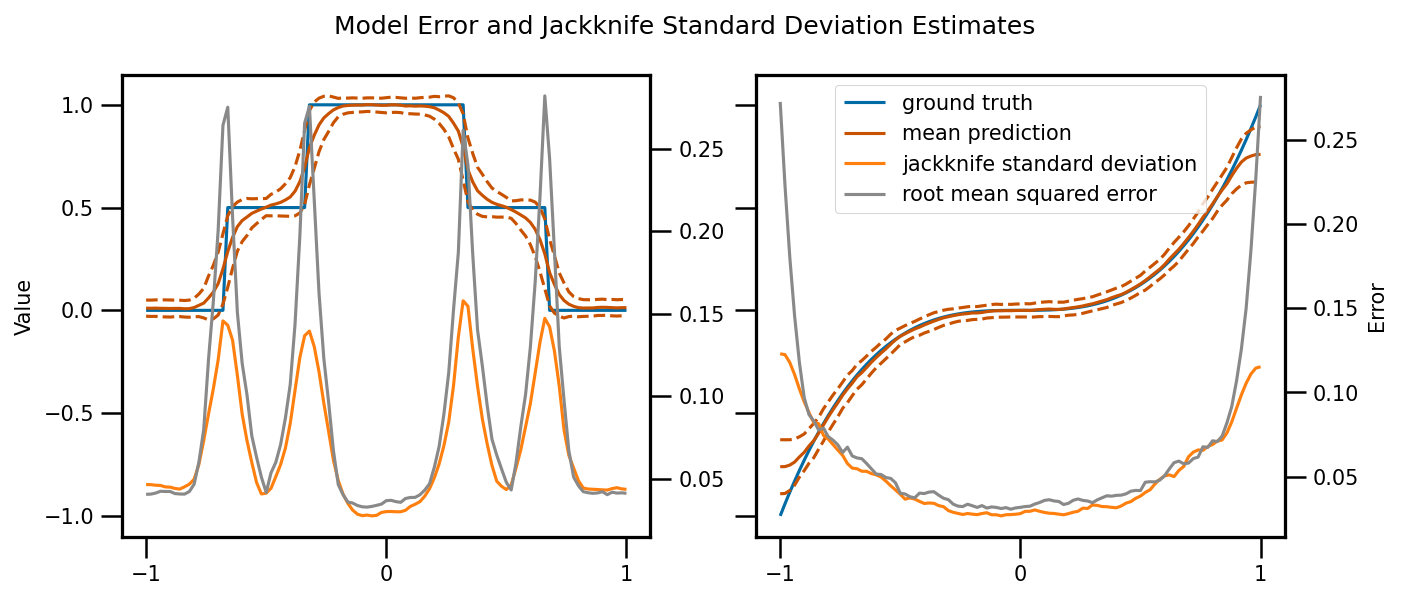

In [8]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharey=True)
do_plot(axs[0], x, y1, predicted_y1, jackknife_y1, False)
do_plot(axs[1], x, y2, predicted_y2, jackknife_y2, True)
plt.suptitle("Model Error and Jackknife Standard Deviation Estimates")
plt.ylabel("Error")
axs[0].set_xticks([-1, 0, 1])
axs[1].set_xticks([-1, 0, 1])
axs[0].set_yticks([-1.0, -0.5, 0.0, 0.5, 1.0])
axs[0].set_ylabel("Value")
plt.savefig("model_error_vs_jackknife.svg")